# Project Fifa Money Ball

## Objectives

<ul style="list-style-type:disc;">
  <li>Rank players by market value based on budget.</li>
  <li>Highlight the top and worst players.</li>
  <li>Don't consider On loan players due to bussines purposes.</li>
  <li>Fixed budget for transfers = 80M€.</li>
</ul>

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Warnings removes the red messages from python versions

import warnings
warnings.filterwarnings('ignore')

# Display all the columns

pd.options.display.max_columns = None

In [2]:
fifa_df = pd.read_csv('fifa21_male2.csv')

fifa_df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [3]:
# Setting ID as the index

fifa_df = fifa_df.set_index('ID')

# Standarizing the columns in Lower Cap and removing spaces

fifa_df.columns = fifa_df.columns.str.replace(' ', '_').str.lower()

fifa_df = fifa_df.drop_duplicates()

fifa_df.shape
fifa_df.describe()

,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17067.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17118.000000,17118.000000,17067.000000,17125.000000,16702.000000,17125.000000,17125.000000,17125.000000,17067.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,60.507620,45.005742,266.607591,57.846423,49.574676,44.387270,54.324321,60.642803,322.693664,65.445898,65.443036,64.602273,62.924847,64.715591,302.414774,59.711416,65.170212,63.309606,65.308555,49.135708,261.922803,56.997839,47.085582,52.372766,55.443605,50.251445,59.940965,141.469898,47.246949,48.279358,46.099725,77.609693,15.600467,15.484672,15.472058,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,13.960635,17.729483,76.809344,18.047250,18.188344,17.504128,14.856911,15.873647,54.933593,14.657889,14.437377,14.372443,9.037279,14.031563,49.380576,13.417931,11.918063,15.313272,12.627212,19.044862,62.913935,17.021619,20.846705,19.094432,13.730080,15.696363,11.751111,61.595180,20.182548,21.483597,21.185154,81.136603,16.828637,16.143679,15.997328,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,7.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,12.000000,11.000000,14.000000,24.000000,17.000000,128.000000,12.000000,22.000000,11.000000,16.000000,4.000000,50.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,17.000000,3.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,56.000000,32.000000,232.000000,53.000000,37.000000,32.000000,45.000000,57.000000,294.000000,58.000000,59.000000,57.000000,57.000000,57.000000,272.000000,50.000000,58.000000,56.000000,58.000000,35.000000,235.000000,45.000000,26.000000,43.000000,47.000000,40.000000,53.000000,84.000000,29.000000,28.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,63.000000,46.000000,279.000000,63.000000,51.000000,43.000000,57.000000,64.000000,331.000000,68.000000,68.000000,67.000000,63.000000,67.000000,308.000000,61.000000,66.000000,66.000000,67.000000,53.000000,269.000000,60.000000,53.000000,57.000000,57.000000,51.000000,61.000000,158.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,29.000000,72.000000,72.000000,76.000000,9.000000,306.000000,65.00000

In [4]:
# Filtering out unnecessary columns

data_filtered = fifa_df[['name','age','ova','nationality','club','bov','bp','position','height','weight','foot','joined','value','pot','wage','release_clause','contract','attacking','crossing','finishing','heading_accuracy','short_passing','volleys','skill','dribbling','curve','fk_accuracy','long_passing','ball_control','movement','acceleration','sprint_speed','agility','reactions','balance','power','shot_power','jumping','stamina','strength','long_shots','mentality','aggression','interceptions','positioning','vision','penalties','composure','defending','marking','standing_tackle','sliding_tackle','goalkeeping','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','total_stats','base_stats','w/f','sm','a/w','d/w','ir','pac','sho','pas','dri','def','phy','hits']]

In [5]:
data_filtered.head()

,name,age,ova,nationality,club,bov,bp,position,height,weight,foot,joined,value,pot,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,"6'0""",181lbs,Left,"Jul 1, 2008",€625K,69,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,"5'10""",143lbs,Right,"Jul 19, 2014",€600K,71,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,"5'9""",161lbs,Right,"Jan 7, 2016",€1.1M,71,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,"5'11""",165lbs,Right,NaN,€0,82,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,"5'7""",150lbs,Right,"Jul 16, 2018",€5.5M,81,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149


In [6]:
# Looking for columns with null values

pd.isnull(data_filtered).sum()[pd.isnull(data_filtered).sum() > 0]

club               23
position          413
joined             58
volleys            58
curve              58
agility            58
balance            58
jumping            58
interceptions       7
positioning         7
vision             58
composure         423
sliding_tackle     58
a/w                89
d/w                89
dtype: int64

In [7]:
# Filtering only columns that apply to our objective

data_filtered[['name','club','position','joined','volleys','curve','agility','balance','jumping','interceptions','positioning','vision','composure','sliding_tackle','a/w','d/w']]

,name,club,position,joined,volleys,curve,agility,balance,jumping,interceptions,positioning,vision,composure,sliding_tackle,a/w,d/w
ID,,,,,,,,,,,,,,,,
2,G. Pasquale,Udinese,LM,"Jul 1, 2008",58.0,65.0,68.0,68.0,68.0,69.0,63.0,66.0,NaN,69.0,Medium,High
16,Luis García,KAS Eupen,CM CAM CDM,"Jul 19, 2014",68.0,79.0,62.0,72.0,54.0,71.0,72.0,73.0,79.0,40.0,Medium,Medium
27,J. Cole,Coventry City,CAM RM RW LM,"Jan 7, 2016",75.0,84.0,71.0,75.0,58.0,39.0,69.0,74.0,NaN,30.0,Medium,Low
36,D. Yorke,Sunderland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,72.0,NaN,NaN,NaN,NaN,NaN
41,Iniesta,Vissel Kobe,CM CAM,"Jul 16, 2018",79.0,80.0,79.0,75.0,40.0,70.0,78.0,93.0,89.0,56.0,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,CD Tondela,CB,"Sep 29, 2020",26.0,26.0,46.0,42.0,70.0,58.0,23.0,29.0,46.0,66.0,Medium,Medium
259090,W. Rickard,Burnley,CAM CM,"Aug 20, 2020",41.0,42.0,52.0,68.0,62.0,50.0,55.0,53.0,46.0,56.0,Medium,Medium
259091,C. Barrett,Burnley,RB,"Aug 20, 2020",34.0,43.0,54.0,68.0,61.0,55.0,49.0,45.0,43.0,54.0,Medium,Medium


In [8]:
# Removing special character from contract column

data_filtered['contract'] = data_filtered['contract'].str.split("~ ").str[-1].str.lower()

In [9]:
# Dropping players On Loan, Free and 11648 from the dataset

data_filtered = data_filtered[data_filtered['contract'].str.contains('on loan')==False]
data_filtered = data_filtered[data_filtered['contract'].str.contains('free')==False]
data_filtered = data_filtered[data_filtered['contract'].str.contains('111648')==False]

# Turning all the dates into integers

data_filtered['contract'] = data_filtered['contract'].astype(int)


In [10]:
# Removing retired players or anyone which contract ended before 2021

data_filtered = data_filtered[data_filtered['contract'] >= 2021]

In [11]:
# Replacing the NaN positions with the BP as default

data_filtered['position'] = data_filtered['position'].fillna(data_filtered['bp'])

In [12]:
# Removing players without a Composure Stat

data_filtered = data_filtered[data_filtered['composure'].notnull()]

In [13]:
# Removing &amp from Nationalities

data_filtered['nationality'] = data_filtered['nationality'].str.replace('&amp;','and')

In [14]:
# Checking that now we have no NaN values in the Dataset

pd.isnull(data_filtered).sum()[pd.isnull(data_filtered).sum() > 0]

Series([], dtype: int64)

In [15]:
# Replacing the Euro character with an empty character

data_filtered['value'] = data_filtered['value'].str.replace('€','')
data_filtered['wage'] = data_filtered['wage'].str.replace('€','')
data_filtered['release_clause'] = data_filtered['release_clause'].str.replace('€','')

In [16]:
# Formula that converts wages and player value to integer based on M, K and B.

def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

# Applying formula

data_filtered['value'] = data_filtered['value'].apply(value_to_float)
data_filtered['wage'] = data_filtered['wage'].apply(value_to_float)
data_filtered['release_clause'] = data_filtered['release_clause'].apply(value_to_float)

In [17]:
# Formula for replacing all stars or non numerical values with empty

def remove_non_numeric(x):
    return re.sub(r'[^0-9]', '', x)    

data_filtered['w/f'] = data_filtered['w/f'].apply(remove_non_numeric).astype(int)
data_filtered['sm'] = data_filtered['sm'].apply(remove_non_numeric).astype(int)
data_filtered['ir'] = data_filtered['ir'].apply(remove_non_numeric).astype(int)


In [18]:
# Formula for converting inches to CM

data_filtered["height"] = data_filtered["height"].str[:-1]

def parse_height(height):    
    height = height.split("'")
    feet = float(height[0])
    inch = float(height[1])
    return ((feet*30.48) + (inch*2.54))

data_filtered["height"]=round(data_filtered["height"].apply(lambda x:parse_height(x)),0)

In [19]:
# Converting weight to kg

data_filtered["weight"] = round(data_filtered["weight"].str.split("lbs").str[0].astype(float)*0.45359237,0)

In [20]:
# Converting millions to "M€" in value and release_clause

data_filtered["value"] = (data_filtered["value"].astype(float)/1000000).astype(str) + "M€"
data_filtered["release_clause"] = (data_filtered["release_clause"].astype(float)/1000000).astype(str) + "M€"

In [21]:
data_filtered.sample(5)

,name,age,ova,nationality,club,bov,bp,position,height,weight,foot,joined,value,pot,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
234906,H. Aouar,22,81,France,Olympique Lyonnais,84,CAM,CM LM,175.0,70.0,Right,"Jul 1, 2016",26.0M€,89,65000.0,54.6M€,2023,356,68,76,59,85,68.0,400,85,80.0,70,80,85,397,78,74,82.0,80,83.0,355,73,64.0,76,67,75,369,67,69.0,78.0,84.0,71,82.0,194,68,68,58.0,48,14,6,11,7,10,2119,450,3,4,High,Medium,1,76,75,80,84,66,69,1.2K
204102,Y. Ayoub,26,71,Morocco,Panathinaikos FC,74,LM,CM LM CDM,175.0,70.0,Left,"Jan 22, 2020",2.8M€,73,0.0,6.4M€,2023,330,78,62,52,72,66.0,363,76,74.0,69,70,74,373,71,68,74.0,70,90.0,315,75,38.0,69,68,65,352,74,67.0,66.0,75.0,70,74.0,204,65,69,70.0,59,16,10,8,16,9,1996,418,3,3,Medium,Medium,1,69,66,73,76,66,68,17
231424,A. Arslan,26,65,Germany,Holstein Kiel,67,CAM,CAM CF CM,180.0,77.0,Right,"Jul 1, 2020",0.65M€,67,5000.0,1.1M€,2024,296,59,63,50,66,58.0,325,67,67.0,60,64,67,348,73,66,74.0,61,74.0,321,64,56.0,75,61,65,267,39,45.0,66.0,58.0,59,61.0,126,43,42,41.0,49,7,10,13,5,14,1732,366,4,3,High,Medium,1,69,63,62,68,44,60,6
231110,P. Erras,25,69,Germany,SV Werder Bremen,70,CDM,CDM CB CM,196.0,87.0,Right,"Jul 30, 2020",1.3M€,74,11000.0,2.3M€,2023,232,44,40,57,73,18.0,224,41,24.0,32,67,60,201,33,37,31.0,71,29.0,279,49,34.0,68,81,47,273,63,69.0,43.0,67.0,31,75.0,199,71,71,57.0,53,13,9,11,8,12,1461,325,3,2,Medium,High,1,35,42,61,47,68,72,38
202811,E. Martínez,27,78,Argentina,Aston Villa,78,GK,GK,196.0,90.0,Right,"Sep 16, 2020",9.0M€,81,43000.0,17.8M€,2024,122,22,16,26,45,13.0,138,13,22.0,20,48,35,287,59,57,49.0,73,49.0,245,59,60.0,40,70,16,168,37,13.0,12.0,64.0,42,53.0,51,11,20,20.0,390,78,80,78,77,77,1401,448,3,1,Medium,Medium,1,78,80,78,77,58,77,213


In [22]:
benfica = data_filtered[data_filtered['club'] == 'SL Benfica'].sort_values(by=['ova'], ascending = False)

#benfica = benfica[['age','ova','bov','pot','value']]

data_filtered_heat = data_filtered[['age','ova','bov','pot','value']]

<AxesSubplot:>

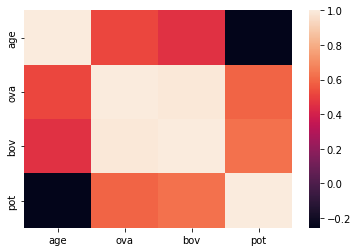

In [23]:
sns.heatmap(data_filtered_heat.corr())

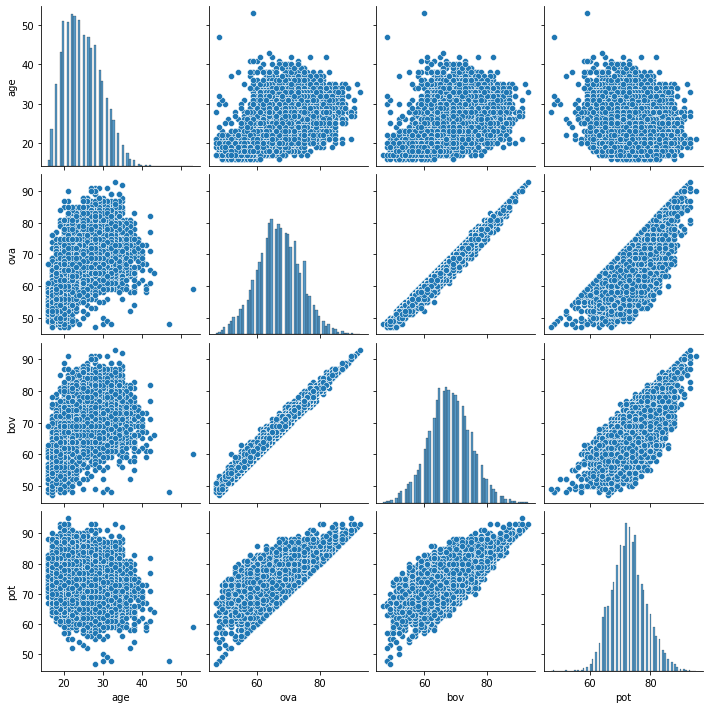

In [24]:
sns.pairplot(data_filtered_heat)


array([63.72013407])

array([[0.48048839]])

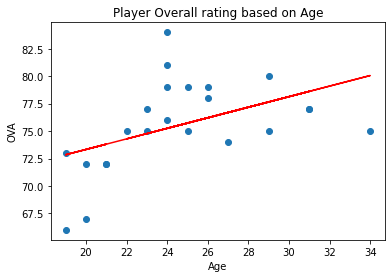

In [25]:
x = benfica.iloc[:,1:2].values
y = benfica.iloc[:,2:3].values

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.coef_[0]*x + result.intercept_
plt.plot(x, regression_line, c = 'red')
plt.title('Player Overall rating based on Age')
plt.xlabel("Age")
plt.ylabel("OVA")

plt.scatter(x,y)
plt.show()

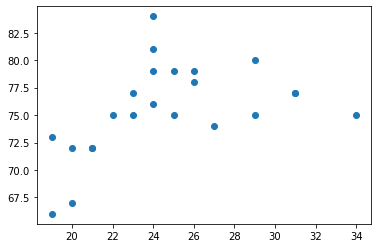

In [26]:
plt.scatter(benfica['age'],benfica['ova'])

array([96.98132631])

array([[-0.63945415]])

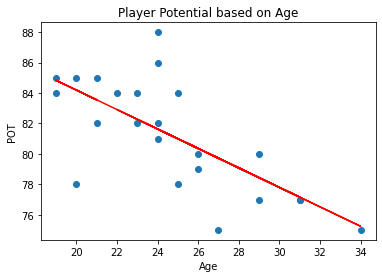

In [27]:
x = benfica.iloc[:,1:2].values
y = benfica.iloc[:,13:14].values

model = linear_model.LinearRegression()

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

regression_line = result.coef_[0]*x + result.intercept_
plt.plot(x, regression_line, c = 'red')
plt.title('Player Potential based on Age')
plt.xlabel("Age")
plt.ylabel("POT")

plt.scatter(x,y)
plt.show()

In [28]:
# Checking the current Benfica team to compare players' performances

benfica_before = benfica[["name","age","ova","pot","bp","value"]]
benfica_before.sort_values(by=["ova","pot"],ascending=True)
benfica_before

,name,age,ova,pot,bp,value
ID,,,,,,
210035,Grimaldo,24,84,88,LWB,35.5M€
222716,Everton,24,81,86,CAM,24.0M€
194022,André Almeida,29,80,80,RB,12.0M€
208141,Gabriel,26,79,80,CM,14.5M€
244621,Vinícius,25,79,84,ST,17.0M€
222028,J. Weigl,24,79,82,CDM,14.5M€
223061,F. Cervi,26,78,79,LM,12.0M€
208230,A. Samaris,31,77,77,CB,6.5M€
242236,Ferro,23,77,84,CB,11.5M€


In [29]:
# Simple calculations to see the values that are above the average to be able to compare players

display(benfica_before["age"].agg("mean"))
display(benfica_before["ova"].agg("mean"))
display(benfica_before["pot"].agg("mean"))

24.652173913043477

75.56521739130434

81.21739130434783

In [30]:
# Decision on worst players
# Jardel: 34 years old; 75 ova; 75 pot; CB > too old for the team and below the average on both KPIs
# M. Svilar: 20 years old; 67 ova; 78 pot; GK > despite his young age, not enough potential
# A. Taarabt: 31 years old; 77 ova; 77 pot; CAM > already old for the team, not exceptional KPIs. Good market value = we would increase our budget by selling him

In [31]:
# Drop out worst players
# We earn 2.5M€ from Jardel, 1.1M€ from M. Svilar, and 7.5M€ from A. Taarabt > Total 11.1M€

benfica_sells = benfica_before[(benfica_before["name"].str.contains("Jardel")==False) & (benfica_before["name"].str.contains("M. Svilar")==False)& (benfica_before["name"].str.contains("A. Taarabt")==False)]
benfica_sells.sort_values(by=["ova","pot"],ascending=True)
benfica_sells

,name,age,ova,pot,bp,value
ID,,,,,,
210035,Grimaldo,24,84,88,LWB,35.5M€
222716,Everton,24,81,86,CAM,24.0M€
194022,André Almeida,29,80,80,RB,12.0M€
208141,Gabriel,26,79,80,CM,14.5M€
244621,Vinícius,25,79,84,ST,17.0M€
222028,J. Weigl,24,79,82,CDM,14.5M€
223061,F. Cervi,26,78,79,LM,12.0M€
208230,A. Samaris,31,77,77,CB,6.5M€
242236,Ferro,23,77,84,CB,11.5M€


In [32]:
# Look for replacements taking into account the bp

# New GK to replace the one we sold. The other 2 were middle game players so...
# ...we will hire a LM, RM, and GK with a fixed 80M€ budget + the profit from selling our top 3 worst players (11.1M€)

In [33]:
# Searching the new LM to join Benfica

LM = data_filtered[data_filtered['bp'] == 'LM']
LM_filtered = LM[["name","age","ova","pot","value","release_clause"]]
LM_best = LM_filtered[(LM_filtered["age"] <26) & (LM_filtered["ova"] >76) & (LM_filtered["pot"] >81)]
LM_best.sort_values(by=["ova","pot"],ascending=False)

,name,age,ova,pot,value,release_clause
ID,,,,,,
222492,L. Sané,24,85,90,51.5M€,88.8M€
231443,O. Dembélé,23,83,89,35.5M€,79.9M€
226110,N. Pépé,25,82,85,28.0M€,55.3M€
223697,R. Gosens,25,82,82,24.0M€,40.8M€
239231,Cucurella,21,81,89,26.5M€,61.0M€
241852,M. Diaby,20,81,88,25.0M€,47.5M€
224411,Gonçalo Guedes,23,81,87,24.5M€,56.4M€
233419,Raphinha,23,81,85,23.0M€,45.4M€
243282,D. McNeil,20,78,86,15.5M€,32.6M€


In [34]:
LM_hired = LM_best[LM_best["name"] == "M. Edwards"]
LM_hired 

,name,age,ova,pot,value,release_clause
ID,,,,,,
235619,M. Edwards,21,77,89,16.0M€,36.8M€


In [35]:
# Decision on LM

# LMs with a high "ova" are too expensive for our budget. M.Edwards is still above our average and has a great "pot"
# This player is a great option for a fair price

In [36]:
# Searching the new RM to join Benfica

RM = data_filtered[data_filtered['bp'] == 'RM']
RM_filtered = RM[["name","age","ova","pot","value","release_clause"]]
RM_best = RM_filtered[(RM_filtered["age"] <26) & (RM_filtered["ova"] >76) & (RM_filtered["pot"] >81)]
RM_best.sort_values(by=["ova","pot"],ascending=False)

,name,age,ova,pot,value,release_clause
ID,,,,,,
231677,M. Rashford,22,85,91,53.0M€,111.3M€
206113,S. Gnabry,24,85,87,47.5M€,81.9M€
213345,K. Coman,24,84,88,40.5M€,69.9M€
235212,A. Hakimi,21,83,88,35.0M€,60.4M€
241461,Ferran Torres,20,81,89,26.5M€,54.3M€
227796,C. Pulisic,21,81,87,24.5M€,51.5M€
238794,Vinícius Jr.,19,80,93,27.5M€,73.6M€
227055,Gelson Martins,25,80,83,18.5M€,36.5M€
243812,Rodrygo,19,79,90,21.0M€,47.3M€


In [37]:
RM_hired = RM_best[RM_best["name"] == "I. Sarr"]
RM_hired

,name,age,ova,pot,value,release_clause
ID,,,,,,
235353,I. Sarr,22,78,87,16.0M€,32.0M€


In [38]:
# Decision on RM

# Again, the avg. price for RM is too high. Thus, a young player such as I.Sarr is a good investment for us

In [39]:
# Searching the new GK to join Benfica

GK = data_filtered[data_filtered['bp'] == 'GK']
GK_filtered = GK[["name","age","ova","pot","value","release_clause"]]
GK_best = GK_filtered[(GK_filtered["age"] <25) & (GK_filtered["ova"] >76) & (GK_filtered["pot"] >81)]
GK_best.sort_values(by=["ova","pot"],ascending=False)

,name,age,ova,pot,value,release_clause
ID,,,,,,
230621,G. Donnarumma,21,85,92,41.5M€,78.9M€
226753,A. Onana,24,84,88,30.0M€,44.3M€
215698,M. Maignan,24,82,86,21.5M€,42.5M€
233306,D. Henderson,23,80,87,16.0M€,33.6M€
230869,Unai Simón,23,80,86,15.5M€,35.7M€
241727,P. Rajković,24,79,84,12.5M€,25.9M€
244316,Luís Maximiano,21,78,88,13.5M€,29.7M€
225116,A. Meret,23,78,87,12.5M€,23.8M€
223898,P. Bernardoni,23,78,84,10.5M€,23.1M€


In [40]:
GK_hired = GK_best[GK_best["name"] == "A. Meret"]
GK_hired

,name,age,ova,pot,value,release_clause
ID,,,,,,
225116,A. Meret,23,78,87,12.5M€,23.8M€


In [41]:
# Decision on GK

# Our previous GK was younger than A.Meret but this one has way more "pot" and a great "ova". Also, GKs tend...
# ...to play at a great level for longer (overall, a normal player at 25 reaches already his max potential)

In [42]:
# Finally, as we have 3 new players, we will add them to our team, the end result

benfica_after = benfica_sells.append([LM_hired,RM_hired,GK_hired])
benfica_after.fillna(0)

,name,age,ova,pot,bp,value,release_clause
ID,,,,,,,
210035,Grimaldo,24,84,88,LWB,35.5M€,0
222716,Everton,24,81,86,CAM,24.0M€,0
194022,André Almeida,29,80,80,RB,12.0M€,0
208141,Gabriel,26,79,80,CM,14.5M€,0
244621,Vinícius,25,79,84,ST,17.0M€,0
222028,J. Weigl,24,79,82,CDM,14.5M€,0
223061,F. Cervi,26,78,79,LM,12.0M€,0
208230,A. Samaris,31,77,77,CB,6.5M€,0
242236,Ferro,23,77,84,CB,11.5M€,0


In [43]:
# If now we check the averages, we can see that they have increased due to our transfers

# Our team before

display(benfica_before["age"].agg("mean"))
display(benfica_before["ova"].agg("mean"))
display(benfica_before["pot"].agg("mean"))

24.652173913043477

75.56521739130434

81.21739130434783

In [44]:
# Our team now

display(benfica_after["age"].agg("mean"))
display(benfica_after["ova"].agg("mean"))
display(benfica_after["pot"].agg("mean"))

23.82608695652174

76.17391304347827

82.65217391304348

In [45]:
benfica.to_csv('benfica_clean.csv')
data_filtered.to_csv('data_filtered.csv')